ㄹ**Lab 7 : Node2Vec**
- Instuctor : Kijung Shin
- Teaching Assistants : Hyunju Lee(main), Deukryeol Yoon, Shinhwan Kang 
- 본 실습에서는 random walk 기반 network embedding 방법 중 하나인 node2vec 알고리즘을 사용하여 clustering, node classification과 같은 여러 downstream task들을 수행해본다.

* 학습 목표

> 1. node2vec library의 사용법을 익힌다.
2. node2vec embedding 벡터를 사용하여 여러 downstream tasks(clustering, node classification)를 수행하는 방법을 익힌다.




**Clustering with Node2Vec**


In [3]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as pyplot
import os, sys 


In [ ]:
###################### Dataset Description ##########################
'''
    [Reference]
        title={The Network Data Repository with Interactive Graph Analytics and Visualization},
        author={Ryan A. Rossi and Nesreen K. Ahmed},
        booktitle={AAAI},
        url={http://networkrepository.com},
        year={2015}

'''
###### lesmis.mtx : <node 1> <node 2> <weight> ######################
###### weight : 레미제라블에 동시에 등장한 등장인물의 횟수 ##########
#####################################################################

In [8]:
##### Weighted Graph Generation #####

weighted_edgelist=[]
with open('../data/lab/lab7/lesmis.mtx', 'r') as f:
    for line in f:
        l = line.strip().split()
        if l[0].isdigit() == False:
            continue
        weighted_edgelist.append((str(int(l[0])-1), str(int(l[1])-1), float(l[2])))


G = nx.Graph()
G.add_weighted_edges_from(weighted_edgelist)       

%%MatrixMarket
77
2
3
4
5
6
7
8
9
10
12
4
12
12
12
13
14
15
16
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
44
45
49
50
52
56
59
65
69
70
71
72
73
24
18
19
20
21
22
23
24
27
56
19
20
21
22
23
24
20
21
22
23
24
21
22
23
24
22
23
24
23
24
24
25
26
28
30
31
32
26
27
28
42
43
51
69
70
71
27
28
40
41
42
43
49
56
69
70
71
72
76
28
44
50
52
55
56
73
29
30
32
34
44
49
59
69
70
71
72
73
45
46
35
36
37
38
39
32
36
37
38
39
37
38
39
38
39
39
53
56
43
56
58
63
69
70
71
72
76
48
49
56
58
59
60
61
62
63
64
65
66
67
69
70
72
74
75
76
77
51
52
55
56
57
53
54
55
56
56
57
58
59
60
62
63
64
65
66
59
60
62
63
64
65
66
68
60
61
62
63
64
65
66
67
71
77
61
62
63
64
65
66
67
62
63
64
65
66
67
63
64
65
66
67
64
65
66
67
77
65
66
67
77
66
67
77
67
77
77
70
71
72
76
71
72
76
72
76
76
75


In [11]:
############################ Fill in Your Code ############################################
node2vec=Node2Vec(G,dimensions=16,walk_length=4,num_walks=200, workers=4)
#node embedding 구하기 

model= node2vec.fit(window=2, min_count=1, batch_words=4)
##############################################################################################

Computing transition probabilities: 100%|██████████| 77/77 [00:00<00:00, 3848.81it/s]


In [12]:
print("#### Embedding Vector of Node 2 ####")
print(model.wv['2'])

#### Embedding Vector of Node 2 ####
[-0.01845144  0.5978635   0.9781493  -1.5500782   0.45957652  1.3094084
 -0.07293648  0.40879834  0.3895611  -0.5001162   0.64619714 -0.42654857
 -0.5361215  -0.7434068  -0.32822472 -0.57221186]


In [13]:
##### Node 2와 가장 유사한 10개의 node를 출력 #####

print("#### Most Similar Nodes to Node 2")
model.wv.most_similar('2')  

#### Most Similar Nodes to Node 2


[('3', 0.996545672416687),
 ('9', 0.9918935298919678),
 ('4', 0.9913127422332764),
 ('1', 0.9911731481552124),
 ('5', 0.9897174835205078),
 ('0', 0.9874488115310669),
 ('8', 0.987438976764679),
 ('7', 0.986819326877594),
 ('6', 0.9858233332633972),
 ('13', 0.6555352807044983)]

In [14]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

In [19]:
#### sklearn.cluster의 KMeans 알고리즘을 실행시키기 위해 node별 embedding 값을 array로 변환해준다 
#### 노드 번호에 해당하는 index에 embedding 값을 저장
vectors_array = np.zeros((len(G.nodes), 16))
for node in G.nodes:
    vectors_array[int(node)] = model.wv[node]
vectors_array.shape

(77, 16)

In [21]:
#### kmeans clustering 알고리즘 실행 ###

############### Fill in Your Code #############################
kmeans= KMeans(n_clusters=5, random_state=0).fit(vectors_array)

################################################################

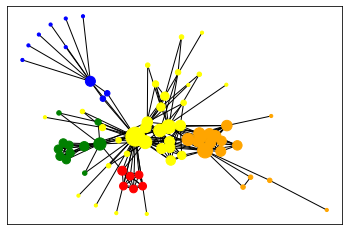

In [22]:


#### 그래프 시각화 - 각 클러스터별로 다른 색깔을 갖도록 함 ####
pos = nx.spring_layout(G)
node_color=[]
node_degree = []
for node in G.nodes:
    node_degree.append(G.degree[node]*10)
    i = int(node)
    if kmeans.labels_[i] == 0:
        node_color.append('red')
    elif kmeans.labels_[i] == 1:
        node_color.append('yellow')
    elif kmeans.labels_[i] == 2:
        node_color.append('blue')
    elif kmeans.labels_[i] == 3:
        node_color.append('green')
    else:
        node_color.append('orange')

img = nx.draw_networkx_nodes(G, pos, node_color = node_color, node_size=node_degree)
nx.draw_networkx_edges(G, pos)
plt.show()

**Node Classification**

In [ ]:
###################### Dataset Description ##########################
##### cora.content : <paper_id> <word_attributes> <class_name> #####
##### cora.cites : <ID of cited paper> <ID of citing paper> #########
#####################################################################

In [27]:
# Directed Graph Generation 
# 메모리 활용을 위해 node class는 숫자로 re-labelling하여 사용

node_class = dict()
edgelist = list()
class_num = 1
class_name_to_num = dict()
with open('../data/lab/lab7/cora.content', 'r') as f, open('../data/lab/lab7/cora.cites','r') as f2:
    for line in f:

        l = line.strip().split()
        class_name = l[-1]
        if class_name not in class_name_to_num:
            class_name_to_num[class_name] = class_num
            class_num += 1
        node_class[l[0]] = class_name_to_num[class_name]

    for line in f2:
        l = line.strip().split()
        edgelist.append((l[1],l[0]))


print(len(node_class))
print(len(edgelist))
print(node_class)
(print(class_name_to_num))
G = nx.DiGraph()
G.add_edges_from(edgelist)


2708
5429
{'31336': 1, '1061127': 2, '1106406': 3, '13195': 3, '37879': 4, '1126012': 4, '1107140': 5, '1102850': 1, '31349': 1, '1106418': 5, '1123188': 1, '1128990': 6, '109323': 4, '217139': 7, '31353': 1, '32083': 1, '1126029': 3, '1118017': 1, '49482': 1, '753265': 1, '249858': 5, '1113739': 3, '48766': 6, '646195': 4, '1126050': 3, '59626': 5, '340299': 1, '354004': 4, '242637': 1, '1106492': 2, '74975': 7, '1152272': 1, '100701': 7, '66982': 1, '13960': 3, '13966': 3, '66990': 1, '182093': 3, '182094': 6, '13972': 3, '13982': 5, '16819': 4, '273152': 6, '237521': 1, '1153703': 7, '32872': 3, '284025': 1, '218666': 7, '16843': 4, '1153724': 7, '1153728': 7, '158098': 4, '8699': 5, '1134865': 6, '28456': 5, '248425': 6, '1112319': 5, '28471': 3, '175548': 1, '696345': 1, '28485': 3, '1139195': 7, '35778': 4, '28491': 3, '310530': 7, '1153784': 6, '1481': 7, '1153786': 4, '13212': 1, '1111614': 7, '5055': 5, '4329': 4, '330148': 1, '1105062': 3, '4330': 4, '5062': 7, '4335': 4, '15

In [29]:
import time

In [30]:
s= time.time()
##### Node Embedding #####
node2vec = Node2Vec(G, dimensions=16, walk_length=4, num_walks=200, workers=4)  
model = node2vec.fit(window=10, min_count=1, batch_words=4) 
print("runtime: ", time.time() - s)

Computing transition probabilities: 100%|██████████| 2708/2708 [00:00<00:00, 29104.20it/s]
runtime:  214.74408650398254


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score


In [32]:
#### X : embedding of a node, y : class label of a node ####

X = list()
y = list()
node_name_to_idx = dict()
for i, (v, class_) in enumerate(node_class.items()):
    node_name_to_idx[v] = i
    X.append(model.wv[v])
    y.append(class_)
X = np.array(X)
y = np.array(y)

#################### Fill in Your Code ################################
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True)
clf=MLPClassifier(max_iter=500).fit(X_train,y_train)
#######################################################################


In [33]:
#################### Fill in Your Code ################################
y_predict=clf.predict(X_test)

######################################################################

print("###### Result of prediction #####")
print("Accuracy : {0:05.2f}% ".format(accuracy_score(y_test, y_predict)*100))

###### Result of prediction #####
Accuracy : 79.91% 


In [34]:
print("########## Comparison of Predicted and Test Results ######")
for i in range(len(y_test)//20):
    print("#########################################################")
    print("예측: ", y_predict[i*20:(i+1)*20])
    print("실제: ", y_test[i*20:(i+1)*20])

########## Comparison of Predicted and Test Results ######
#########################################################
예측:  [3 3 6 1 6 4 7 4 5 6 1 1 6 6 1 4 6 1 1 1]
실제:  [1 3 6 1 6 7 7 4 5 6 1 1 6 6 4 7 6 1 1 1]
#########################################################
예측:  [3 3 4 4 1 4 4 4 3 5 5 3 2 4 5 3 1 6 4 5]
실제:  [3 3 5 4 1 4 4 4 3 5 2 3 2 3 5 7 3 7 4 5]
#########################################################
예측:  [1 6 7 3 4 5 5 7 6 7 1 1 1 7 5 3 6 1 1 6]
실제:  [1 7 7 1 4 5 5 7 6 7 3 1 1 2 7 3 6 5 1 1]
#########################################################
예측:  [3 4 1 5 5 1 1 1 4 1 7 4 1 1 7 4 6 4 3 7]
실제:  [3 4 1 5 1 7 1 1 4 1 1 4 1 1 1 4 6 4 3 7]
#########################################################
예측:  [5 6 5 5 6 6 1 7 1 1 2 3 4 7 6 1 6 1 1 2]
실제:  [1 6 1 5 6 6 2 7 5 1 1 1 4 7 6 1 6 1 4 2]
#########################################################
예측:  [1 1 7 5 5 1 4 6 4 7 4 1 7 4 5 1 1 6 5 1]
실제:  [1 4 4 5 1 1 4 3 4 7 4 1 7 4 5 4 1 6 5 1]
#############################